In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, Normalizer

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import utils
import utils1
import scipy.stats as sc


In [2]:
# files = ['1_1. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_2. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_3. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_95955_Paralisis de cuerda_2022_05_06_09_44_12_06052022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_627635_Paralisis de cuerda_2022_06_10_10_32_18_10062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_1. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_1. 769 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_2. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_3. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_95955_Paralisis de cuerda_2022_05_06_09_44_12_06052022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_627635_Paralisis de cuerda_2022_06_10_10_32_18_10062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_1. 219 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_1. 851 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_2. 219 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_2. 851 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_627635_Paralisis de cuerda_2022_06_10_10_32_18_10062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4_1. 717 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4_2. 717 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5_1. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5_2. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5_3. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_1. 458 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_1. 719 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_2. 458 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_2. 719 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8_1. 916 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8_2. 916 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','9_1. 214 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','9_1. 994 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_1. 104 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_1. 147 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_1. 505 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_2. 104 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_2. 505 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12_1. 681 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12_2. 681 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_1. 105 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_1. 930 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_2. 105 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_2. 930 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_3. 105 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','19_1. 897 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','25_1. 138 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1. 327 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2. 627 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3. 150 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4. 126 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4. 164 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5 5840_Normal sin patología_2022_02_25_11_00_57_25022022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5. 126 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6. 100 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','7. 143 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','7. 612 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','7.1605 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8. 681 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8.1318 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','9.1464 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','10. 523 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','10. 624 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','10. 857 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11. 147 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12. 106 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12. 196 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13. 846 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','14. 466 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','14. 693 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','15. 272 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','15. 613 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','15. 693 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','16. 184 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','16. 522 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','17. 522 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','17. 693 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','18. 118 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','18. 897 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','19. 104 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','20. 162 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','20. 846 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','21. 143 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','21. 162 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','22. 110 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','22. 270 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','23. 270 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','24. 283 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','26. 170 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','27. 170 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','28. 134 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','29. 575 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','30. 296 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6240_Paralisis de cuerda_2022_06_17_12_41_05_17062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv']
files = ['1_1. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv']

output = [1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1]

values_list = []

for i, file in enumerate(files):
    df = pd.read_csv(file)
    values = list(df.values)
    values_list.append(values)
    df2 = df.drop(['scorer','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.2','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.5','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.8','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.11'],axis=1)
    df2.columns = ['Up_x','Up_y','Down_x','Down_y','Left_x','Left_y','Right_x','Right_y']
    df2.drop([0,1],axis=0,inplace=True)
    df2 = df2.reset_index().drop(['index'],axis=1)
    df2 =df2.astype('float')

df = pd.read_csv('1_1. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv')
# df = pd.DataFrame(values_list,columns=['Up_x_y_range','Down_x_y_range','Down_x_y_std','Left_x_y_std','Right_x_y_skew','Left_x_y_mean','Right_x_y_mean','Left_x_y_range','Right_x_y_range','y'])


df2


,Up_x,Up_y,Down_x,Down_y,Left_x,Left_y,Right_x,Right_y
0,947.700955,146.689876,983.147521,322.018991,972.973771,421.978477,1009.218657,320.345343
1,947.700955,146.689876,983.147521,322.018991,972.973771,435.518008,1217.557485,467.436758
2,947.700955,146.689876,983.147521,322.018991,972.973771,435.518008,1217.557485,479.871192
3,937.898219,129.706975,981.008039,322.018991,959.981445,421.978477,1201.713292,480.623329
4,917.131744,129.706975,942.266574,347.561337,919.059562,271.507318,1201.713292,546.775848
5,910.458871,129.706975,939.423837,347.561337,919.059562,271.507318,1005.670232,480.623329
6,910.458871,123.709386,939.423837,433.832673,904.697847,134.282454,989.959287,480.623329
7,910.458871,118.755032,949.039346,451.991929,904.697847,129.490834,966.944038,454.579355
8,912.662991,118.755032,949.039346,451.991929,904.157231,134.282454,961.952094,431.690299
9,917.129591,118.755032,955.198662,458.901193,904.157231,369.700159,961.952094,368.358942


In [3]:
files = ['1_1. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_2. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_3. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_95955_Paralisis de cuerda_2022_05_06_09_44_12_06052022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1_627635_Paralisis de cuerda_2022_06_10_10_32_18_10062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_1. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_1. 769 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_2. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_3. 213 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_95955_Paralisis de cuerda_2022_05_06_09_44_12_06052022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2_627635_Paralisis de cuerda_2022_06_10_10_32_18_10062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_1. 219 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_1. 851 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_2. 219 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_2. 851 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3_627635_Paralisis de cuerda_2022_06_10_10_32_18_10062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4_1. 717 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4_2. 717 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5_1. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5_2. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5_3. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_1. 458 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_1. 719 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_2. 458 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6_2. 719 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8_1. 916 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8_2. 916 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','9_1. 214 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','9_1. 994 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_1. 104 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_1. 147 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_1. 505 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_2. 104 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11_2. 505 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12_1. 681 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12_2. 681 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_1. 105 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_1. 930 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_2. 105 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_2. 930 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13_3. 105 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','19_1. 897 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','25_1. 138 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','1. 327 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','2. 627 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','3. 150 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4. 126 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','4. 164 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5 5840_Normal sin patología_2022_02_25_11_00_57_25022022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5. 126 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','5. 824 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6. 100 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','7. 143 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','7. 612 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','7.1605 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8. 681 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','8.1318 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','9.1464 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','10. 523 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','10. 624 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','10. 857 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','11. 147 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12. 106 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','12. 196 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','13. 846 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','14. 466 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','14. 693 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','15. 272 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','15. 613 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','15. 693 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','16. 184 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','16. 522 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','17. 522 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','17. 693 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','18. 118 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','18. 897 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','19. 104 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','20. 162 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','20. 846 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','21. 143 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','21. 162 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','22. 110 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','22. 270 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','23. 270 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','24. 283 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','26. 170 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','27. 170 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','28. 134 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','29. 575 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','30. 296 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv','6240_Paralisis de cuerda_2022_06_17_12_41_05_17062022_recortado.mp4 equalizadoDLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000_filtered.csv']

output = [1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1]

values_list = []

for i, file in enumerate(files):
    df = pd.read_csv(file)
    
    df2 = df.drop(['scorer','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.2','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.5','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.8','DLC_resnet152_TFG Guillermo OtsDec18shuffle1_15000.11'],axis=1)
    df2.columns = ['Up_x','Up_y','Down_x','Down_y','Left_x','Left_y','Right_x','Right_y']
    df2.drop([0,1],axis=0,inplace=True)
    df2 = df2.reset_index().drop(['index'],axis=1)
    df2 =df2.astype('float')
    
    Up = df2[['Up_x','Up_y']]
    Up_x = Up['Up_x'].values
    Up_y = Up['Up_y'].values
    Down = df2[['Down_x','Down_y']]
    Down_x = Down['Down_x'].values
    Down_y = Down['Down_y'].values
    Left = df2[['Left_x','Left_y']]
    Left_x = Left['Left_x'].values
    Left_y = Left['Left_y'].values
    Right = df2[['Right_x','Right_y']]
    Right_x = Right['Right_x'].values
    Right_y = Right['Right_y'].values
    
    df3 = df2.describe(include='all')
    df3 = df3.drop(['Up_x','Up_y','Down_x','Down_y','Left_y','Right_y','Left_x','Right_x'], axis = 1)
    df4 = df3.iloc[2]
    df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
    df4['Down_x_y_range'] = (max(np.sqrt(Down_x**2 + Down_y**2)) - min(np.sqrt(Down_x**2 + Down_y**2)))/np.sqrt(Down_x**2 + Down_y**2).mean()
#     df4['Up_x_y_std'] = (np.sqrt(Up_x**2 + Up_y**2)).std()
    df4['Down_x_y_std'] = (np.sqrt(Down_x**2 + Down_y**2)).std()
    df4['Left_x_y_std'] = np.sqrt(Left_x**2 + Left_y**2).std()
    df4['Right_x_y_std'] = np.sqrt(Right_x**2 + Right_y**2).std()
    df4['Left_x_y_skew'] = sc.skew(np.sqrt(Left_x**2 + Left_y**2))
    df4['Right_x_y_skew'] = sc.skew(np.sqrt(Right_x**2 + Right_y**2))
#     df4['Left_x_y_mean'] = np.sqrt(Left_x**2 + Left_y**2).mean()
#     df4['Right_x_y_mean'] = np.sqrt(Right_x**2 + Right_y**2).mean()
    df4['Left_x_y_range'] = (max(np.sqrt(Left_x**2 + Left_y**2)) - min(np.sqrt(Left_x**2 + Left_y**2)))/np.sqrt(Left_x**2 + Left_y**2).mean()
    df4['Right_x_y_range'] = (max(np.sqrt(Right_x**2 + Right_y**2)) - min(np.sqrt(Right_x**2 + Right_y**2)))/np.sqrt(Right_x**2 + Right_y**2).mean()
#     df4['Left_x_y_kurt'] = sc.kurtosis(np.sqrt(Left_x**2 + Left_y**2))
#     df4['Right_x_y_kurt'] = sc.kurtosis(np.sqrt(Right_x**2 + Right_y**2))
    #     df4['Left_x_mean'] = Left_x.mean()
#     df4['Left_y_mean'] = Left_y.mean()
#     df4['Right_x_mean'] = Right_x.mean()
#     df4['Right_y_mean'] = Right_y.mean()
#     df4['Up_y_mean'] = Up_y.mean()
#     df4['Down_y_mean'] = Down_y.mean()
    df4['Output'] = output[i]
#     print(df4)
    values = list(df4.values)
    values_list.append(values)


# df = pd.DataFrame(values_list,columns=['Up_x_std','Up_y_std','Down_x_std','Down_y_std','Left_x_std','Left_y_std','Right_x_std','Right_y_std','Left_x_mean','Left_y_mean','Right_x_mean','Right_y_mean','y'])
# df = pd.DataFrame(values_list,columns=['Up_y_std','Down_y_std','Left_x_std','Right_x_std','Up_y_mean','Down_y_mean','Left_x_mean','Right_x_mean','y'])
df = pd.DataFrame(values_list,columns=['Up_x_y_range','Down_x_y_range','Down_x_y_std','Left_x_y_std','Right_x_y_std','Left_x_y_skew','Right_x_y_skew','Left_x_y_range','Right_x_y_range','y'])


df

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Up_x_y_range'] = (max(np.sqrt(Up_x**2 + Up_y**2)) - min(np.sqrt(Up_x**2 + Up_y**2)))/np.sqrt(Up_x**2 + Up_y**2).mean()
C:\Users\guill\AppData\Local\Temp\ipykernel_9244\3331074579.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Up_x_y_range,Down_x_y_range,Down_x_y_std,Left_x_y_std,Right_x_y_std,Left_x_y_skew,Right_x_y_skew,Left_x_y_range,Right_x_y_range,y
0,4.344073e-02,1.394966e-01,4.367083e+01,4.098806e+01,8.721173e+01,-0.196605,1.984715,1.526043e-01,2.693708e-01,1.0
1,2.891973e-01,1.756150e-01,5.365235e+01,4.546277e+01,4.895070e+01,0.704882,1.105912,2.003668e-01,1.930434e-01,1.0
2,1.969654e-01,2.385873e-01,3.836772e+01,4.388161e+01,4.963990e+01,0.184324,-1.546107,1.311888e-01,1.876961e-01,1.0
3,4.774178e-01,2.285307e-01,6.808979e+01,6.353418e+01,6.481984e+01,-0.681391,-0.662726,2.636222e-01,2.403512e-01,1.0
4,3.936134e-01,3.246202e-01,9.487352e+01,8.732983e+01,9.566045e+01,-0.055505,0.937828,2.246141e-01,3.113075e-01,1.0
...,...,...,...,...,...,...,...,...,...,...
86,5.767227e+00,2.642107e+00,2.945849e+02,2.658609e+02,2.198233e+02,-1.015199,1.903344,1.415355e+00,5.548305e+00,0.0
87,3.697225e-07,1.909488e-07,6.213054e-07,8.044327e-07,9.539536e-07,0.525092,0.264220,1.427826e-07,1.190230e-07,0.0
88,4.300013e-01,3.888412e-01,7.996793e+01,8.648630e+01,1.412894e+02,-1.006499,-2.381796,4.050139e-01,1.147526e+00,0.0
89,2.805379e-01,3.011191e-01,3.458738e+01,3.801210e+01,3.220099e+01,-1.605396,-1.401236,3.185571e-01,2.825769e-01,0.0


In [4]:
y_0 = df['y']==0
y_0.value_counts()

y
False    59
True     32
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split




Y = df['y']
X = df
X_train, X_test, y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42) # Random State is used to maintain the same split everytime we call the function to split into train and test

print(f'Train dataset shape: {X_train.shape}')
print(f'Test dataset shape: {X_test.shape}')

Train dataset shape: (63, 10)
Test dataset shape: (28, 10)


In [6]:
X_train,y_train

(    Up_x_y_range  Down_x_y_range  Down_x_y_std  Left_x_y_std  Right_x_y_std  \
 31  2.572894e-01    1.699662e-01  3.239339e+01  5.383325e+01      49.479862   
 76  8.442201e-01    5.988115e+00  1.908646e+02  2.908591e+02       0.850752   
 9   2.388225e-01    2.012916e-01  3.775411e+01  7.569607e+01      28.586738   
 69  3.697225e-07    1.909488e-07  5.301094e-07  8.604621e-07       0.000001   
 5   2.213402e-01    5.705035e-01  7.148301e+01  3.519278e+01      32.942727   
 ..           ...             ...           ...           ...            ...   
 20  4.734100e-02    3.106480e-01  1.067708e+02  1.386906e+02     127.130192   
 60  1.527240e+00    1.251446e+00  1.930030e+02  1.925657e+02     207.889155   
 71  3.071168e-07    2.002634e-07  7.776501e-07  8.401946e-07       0.000001   
 14  3.730091e-01    7.789312e-01  1.952355e+02  1.234678e+02     147.377897   
 51  3.778216e-07    1.521004e+01  1.119530e+02  1.476881e+02       0.000001   
 
     Left_x_y_skew  Right_x_y_skew  Le

In [7]:
X_train = X_train.drop('y',axis=1)
X_test = X_test.drop('y',axis=1)

In [8]:
# scaler = RobustScaler() #We set a variable that will be our scaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = Normalizer()

X_train_scaled = scaler.fit_transform(X_train) # We calculate statistical parameters of the training subset with fit function, and then normalize it with transform function
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) # We create a pandas dataframe with our normalized data.
X_test_scaled = scaler.transform(X_test) # We just use transform function since we already have fitted it with our training set. In a real scenario, we wont have available the test subset, and we wont be able to fit our scaler with it.
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns) # We create a pandas dataframe with our normalized data.

In [9]:
X_train_scaled

,Up_x_y_range,Down_x_y_range,Down_x_y_std,Left_x_y_std,Right_x_y_std,Left_x_y_skew,Right_x_y_skew,Left_x_y_range,Right_x_y_range
0,1.659385e-02,6.722132e-03,9.937635e-02,1.750389e-01,1.541416e-01,0.503605,0.722695,1.011562e-02,2.388597e-02
1,5.444792e-02,2.368290e-01,5.855339e-01,9.457289e-01,2.650293e-03,0.508444,0.082244,1.491943e-01,4.218409e-02
2,1.540283e-02,7.961046e-03,1.158220e-01,2.461259e-01,8.905453e-02,0.537498,0.695790,1.239733e-02,1.024464e-02
3,8.597860e-09,0.000000e+00,8.773115e-11,2.207164e-10,1.338897e-09,0.457143,0.747557,2.578798e-17,1.101681e-08
4,1.427531e-02,2.256332e-02,2.192954e-01,1.144294e-01,1.026245e-01,0.463280,0.703979,8.020306e-03,2.502183e-02
...,...,...,...,...,...,...,...,...,...
58,3.053240e-03,1.228607e-02,3.275511e-01,4.509527e-01,3.960410e-01,0.440112,0.700095,1.749080e-02,3.033977e-02
59,9.849925e-02,4.949450e-02,5.920940e-01,6.261277e-01,6.476245e-01,0.260158,0.605003,6.475611e-02,1.259835e-01
60,4.560108e-09,3.683914e-10,8.471362e-10,1.548167e-10,7.426636e-10,0.451710,0.773559,5.372132e-17,1.999078e-08
61,2.405719e-02,3.080660e-02,5.989431e-01,4.014559e-01,4.591175e-01,0.393908,0.693536,3.336279e-02,6.410145e-02


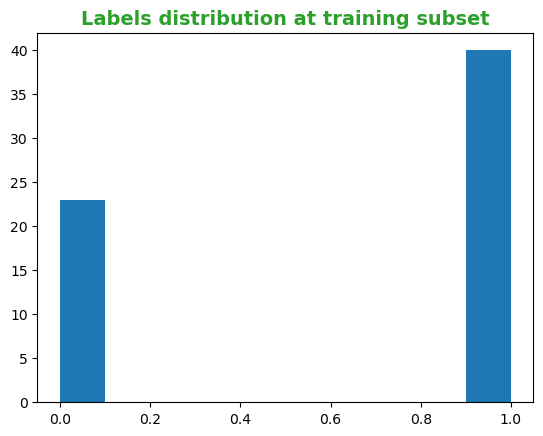

In [10]:
Y_0 = y_train
Y_0.value_counts()


fig, ax = plt.subplots()
ax.hist(Y_0)
ax.set_title('Labels distribution at training subset', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:green'})
labels = [23,40]
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

# Convert each categorical variable to a number
cat_cols = X_train.select_dtypes(include=['object']).columns
X_train_oversampled, Y_train_oversampled = smote.fit_resample(X_train,y_train)

# Following two lines are for checks
# X_train_oversampled
Y_train_oversampled

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
Name: y, Length: 80, dtype: float64

In [12]:
# scaler = RobustScaler() #We set a variable that will be our scaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = Normalizer()

X_train_scaled1 = scaler.fit_transform(X_train_oversampled) # We calculate statistical parameters of the training subset with fit function, and then normalize it with transform function
X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=X_train_oversampled.columns) # We create a pandas dataframe with our normalized data.
X_test_scaled1 = scaler.transform(X_test) # We just use transform function since we already have fitted it with our training set. In a real scenario, we wont have available the test subset, and we wont be able to fit our scaler with it.
X_test_scaled1 = pd.DataFrame(X_test_scaled1,columns=X_test.columns) # We create a pandas dataframe with our normalized data.

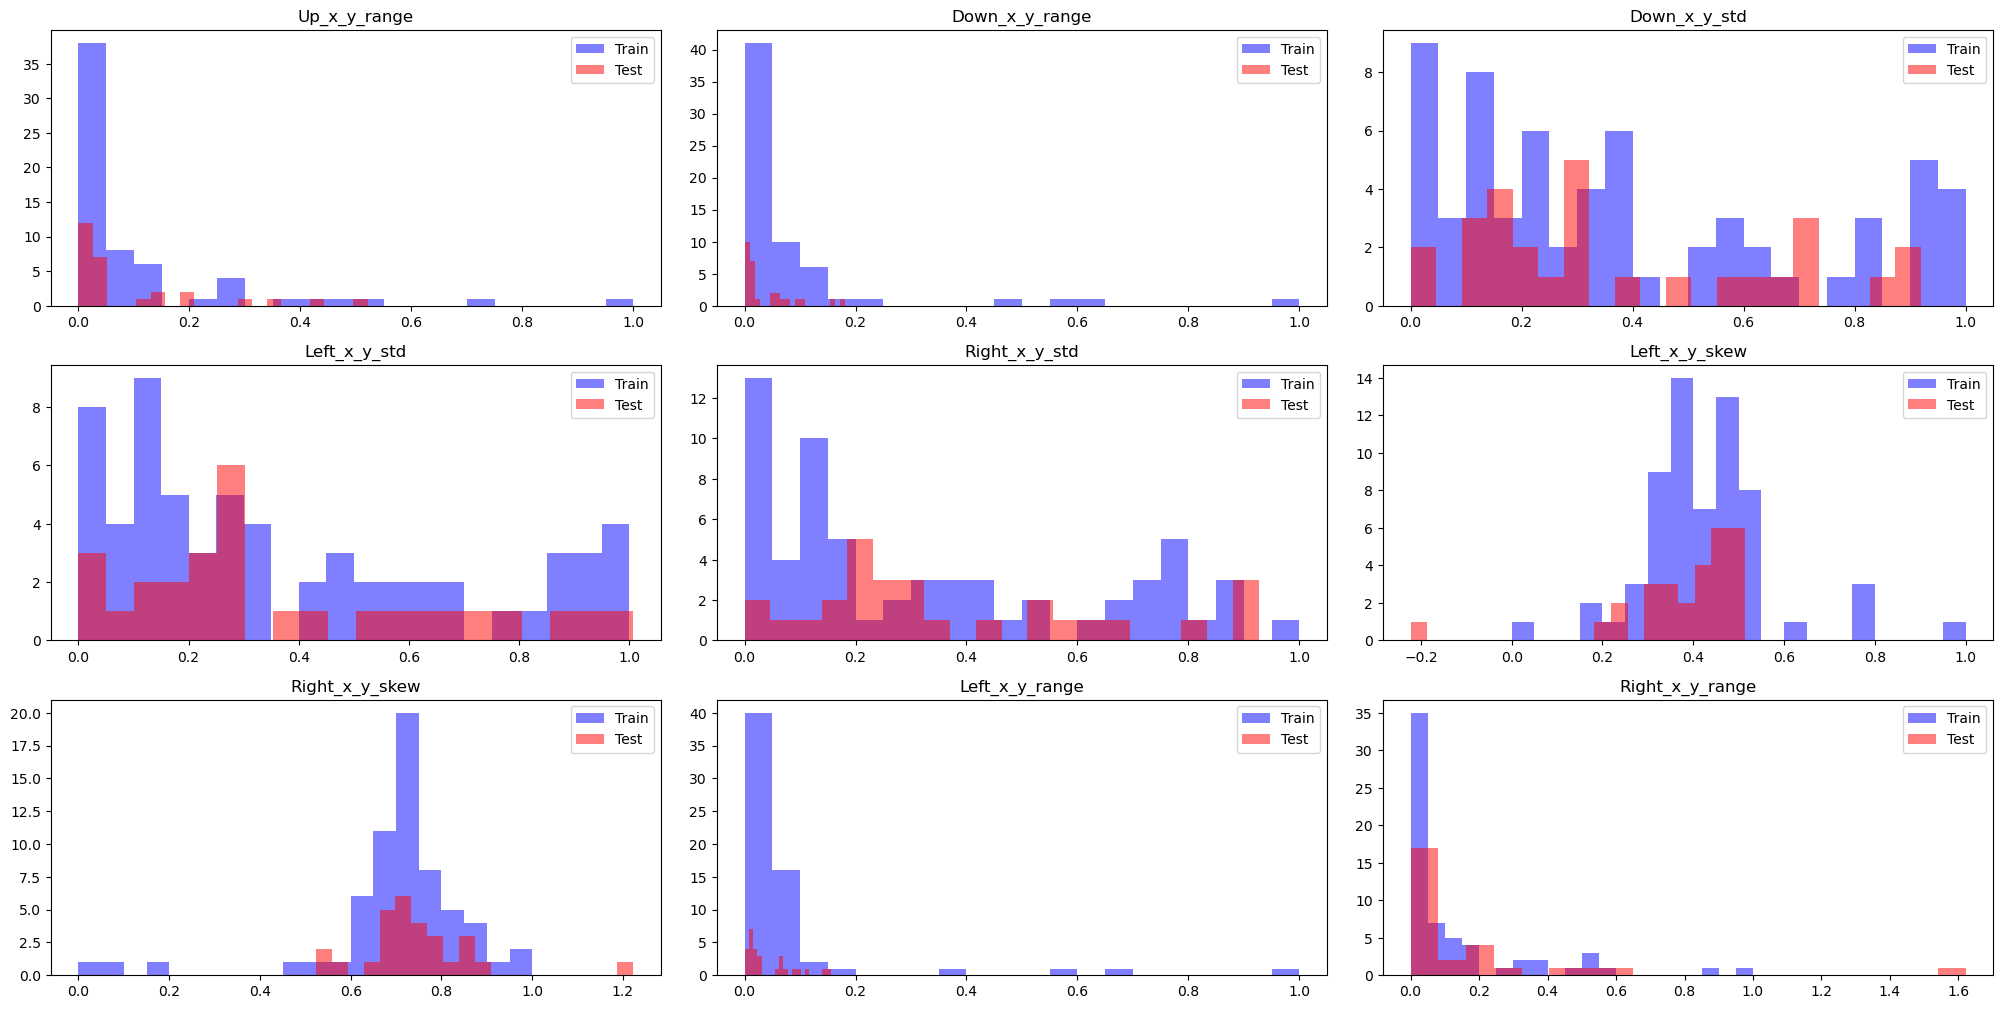

In [13]:
plt.figure(figsize=(20,20))
X_train_plot = X_train_scaled
for i, feature in enumerate(X_train_plot.columns):
    #Plot each of the train/test features in a separate histogram to compare train and test distributions
    plt.subplot(6,3,i+1) # 6 rows of histograms, with 3 plots in each line
    plt.hist(X_train_scaled[feature],alpha= 0.5, bins=20,color='blue', label='Train') # Training histogram in blue.
    plt.hist(X_test_scaled[feature] ,alpha= 0.5, bins=20, color='red', label='Test') # Test histogram in red. Both test and training are plotted in the same histogram.
    plt.title(feature) # The title of each of the histograms is the name of the variable 
    plt.legend()



plt.tight_layout()
plt.show()

Up_x_y_range          AxesSubplot(0.125,0.712609;0.227941x0.167391)
Down_x_y_range     AxesSubplot(0.398529,0.712609;0.227941x0.167391)
Down_x_y_std       AxesSubplot(0.672059,0.712609;0.227941x0.167391)
Left_x_y_std          AxesSubplot(0.125,0.511739;0.227941x0.167391)
Right_x_y_std      AxesSubplot(0.398529,0.511739;0.227941x0.167391)
Left_x_y_skew      AxesSubplot(0.672059,0.511739;0.227941x0.167391)
Right_x_y_skew         AxesSubplot(0.125,0.31087;0.227941x0.167391)
Left_x_y_range      AxesSubplot(0.398529,0.31087;0.227941x0.167391)
Right_x_y_range     AxesSubplot(0.672059,0.31087;0.227941x0.167391)
dtype: object

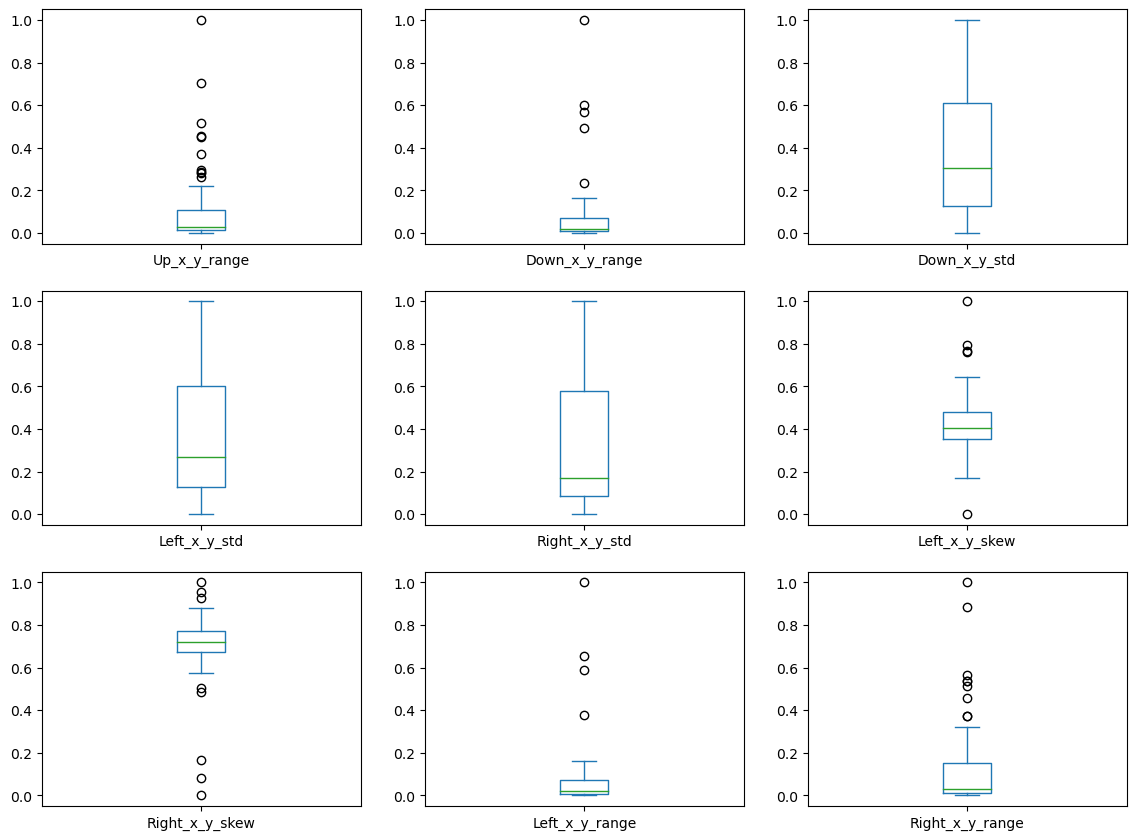

In [14]:
X_train_scaled.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(14,14))          

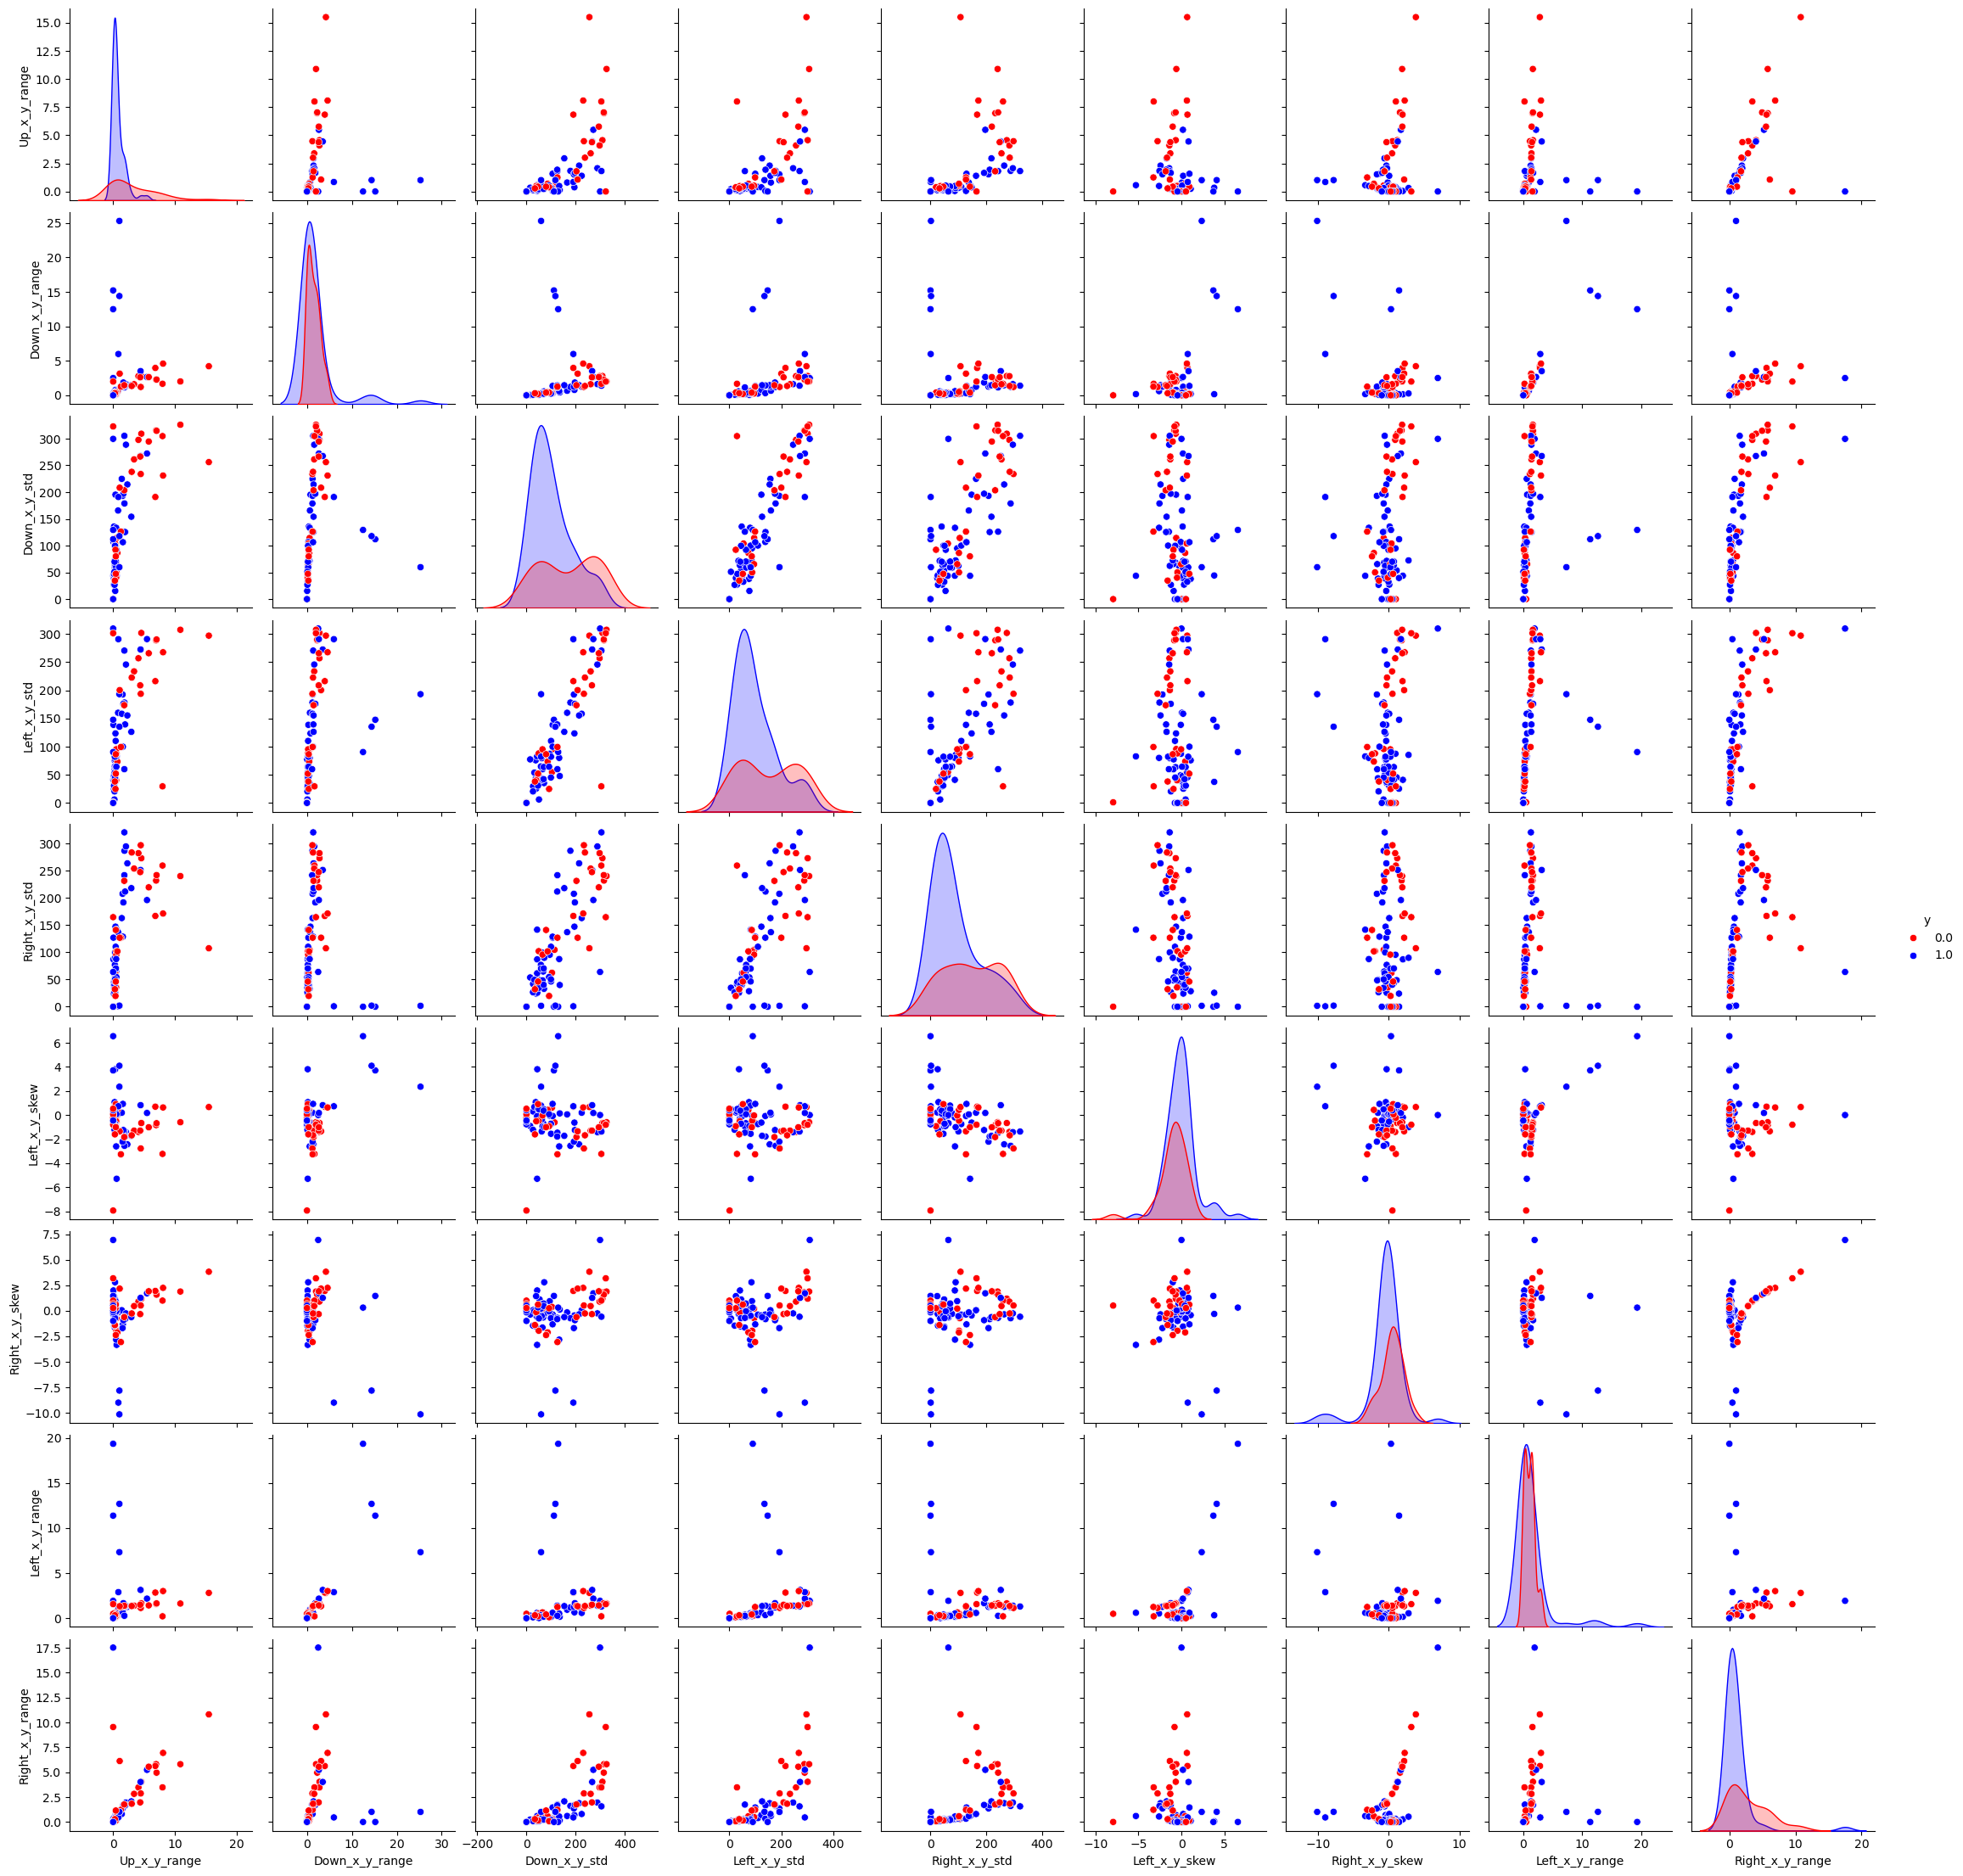

In [15]:
sns.pairplot(df, hue = 'y', palette=['red', 'blue'])

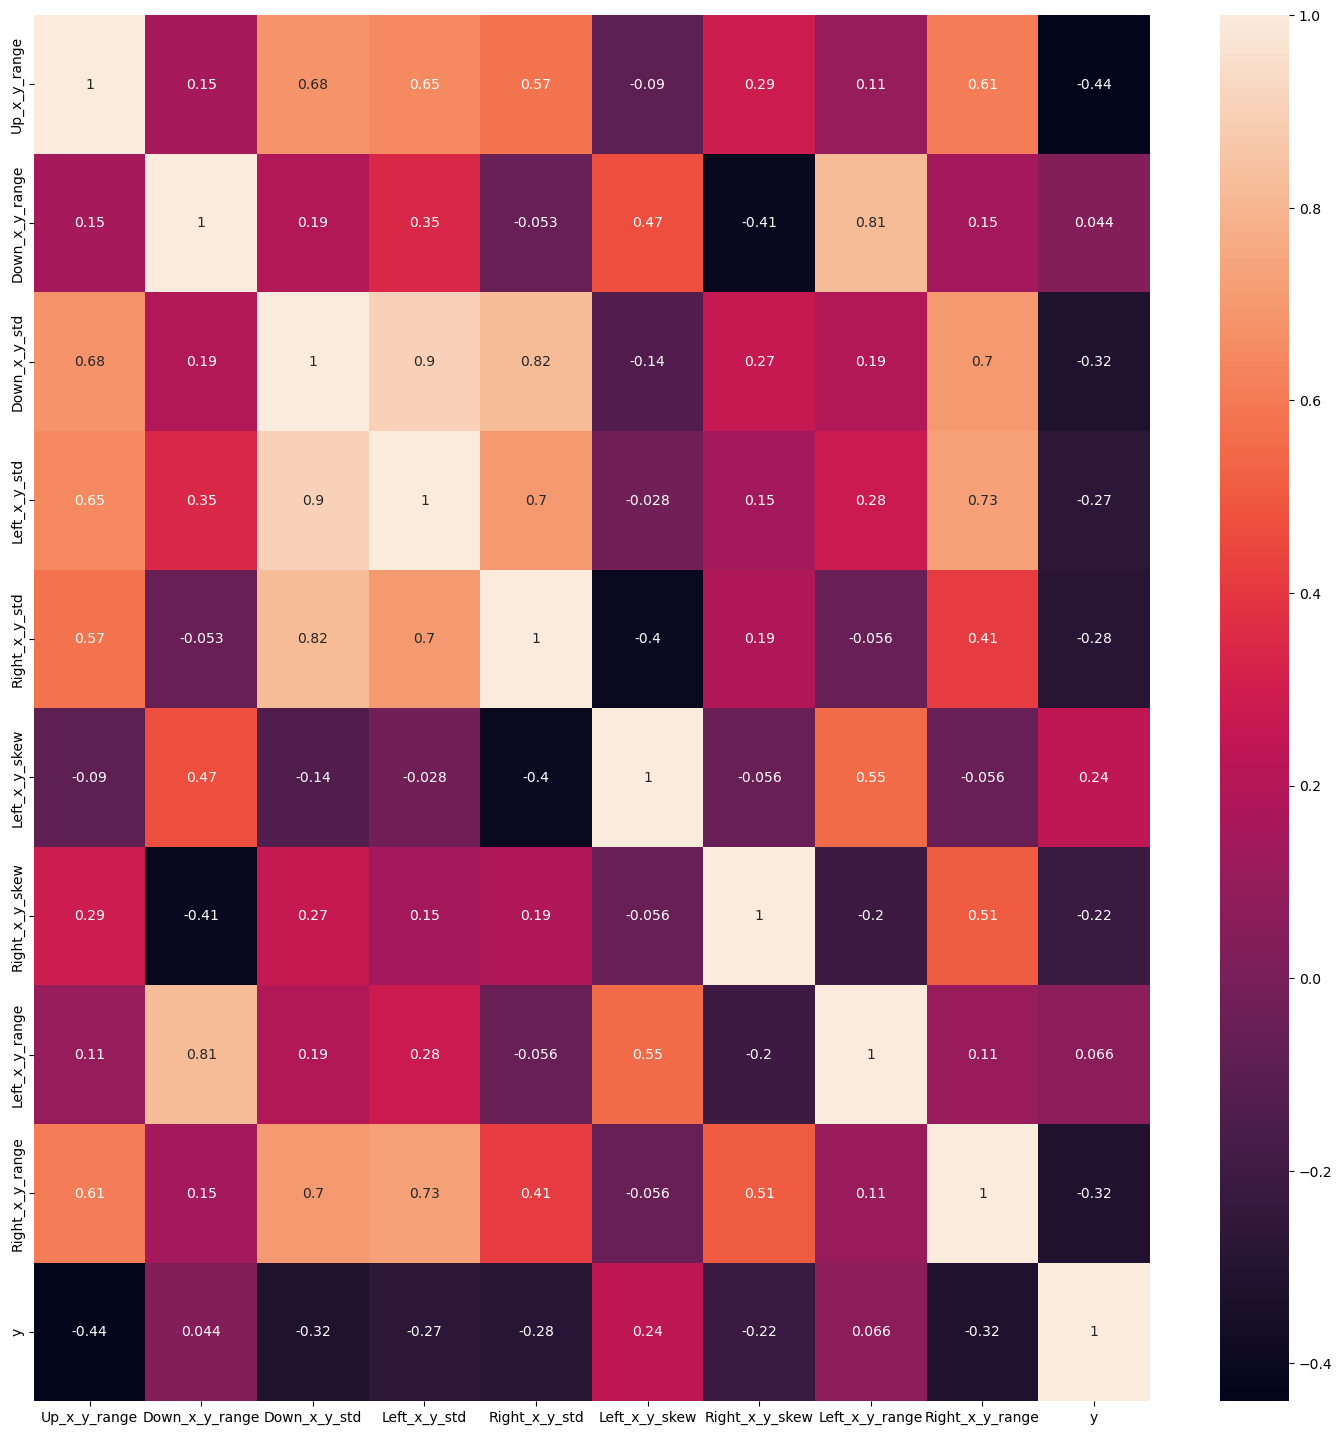

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot=True)
plt.show()

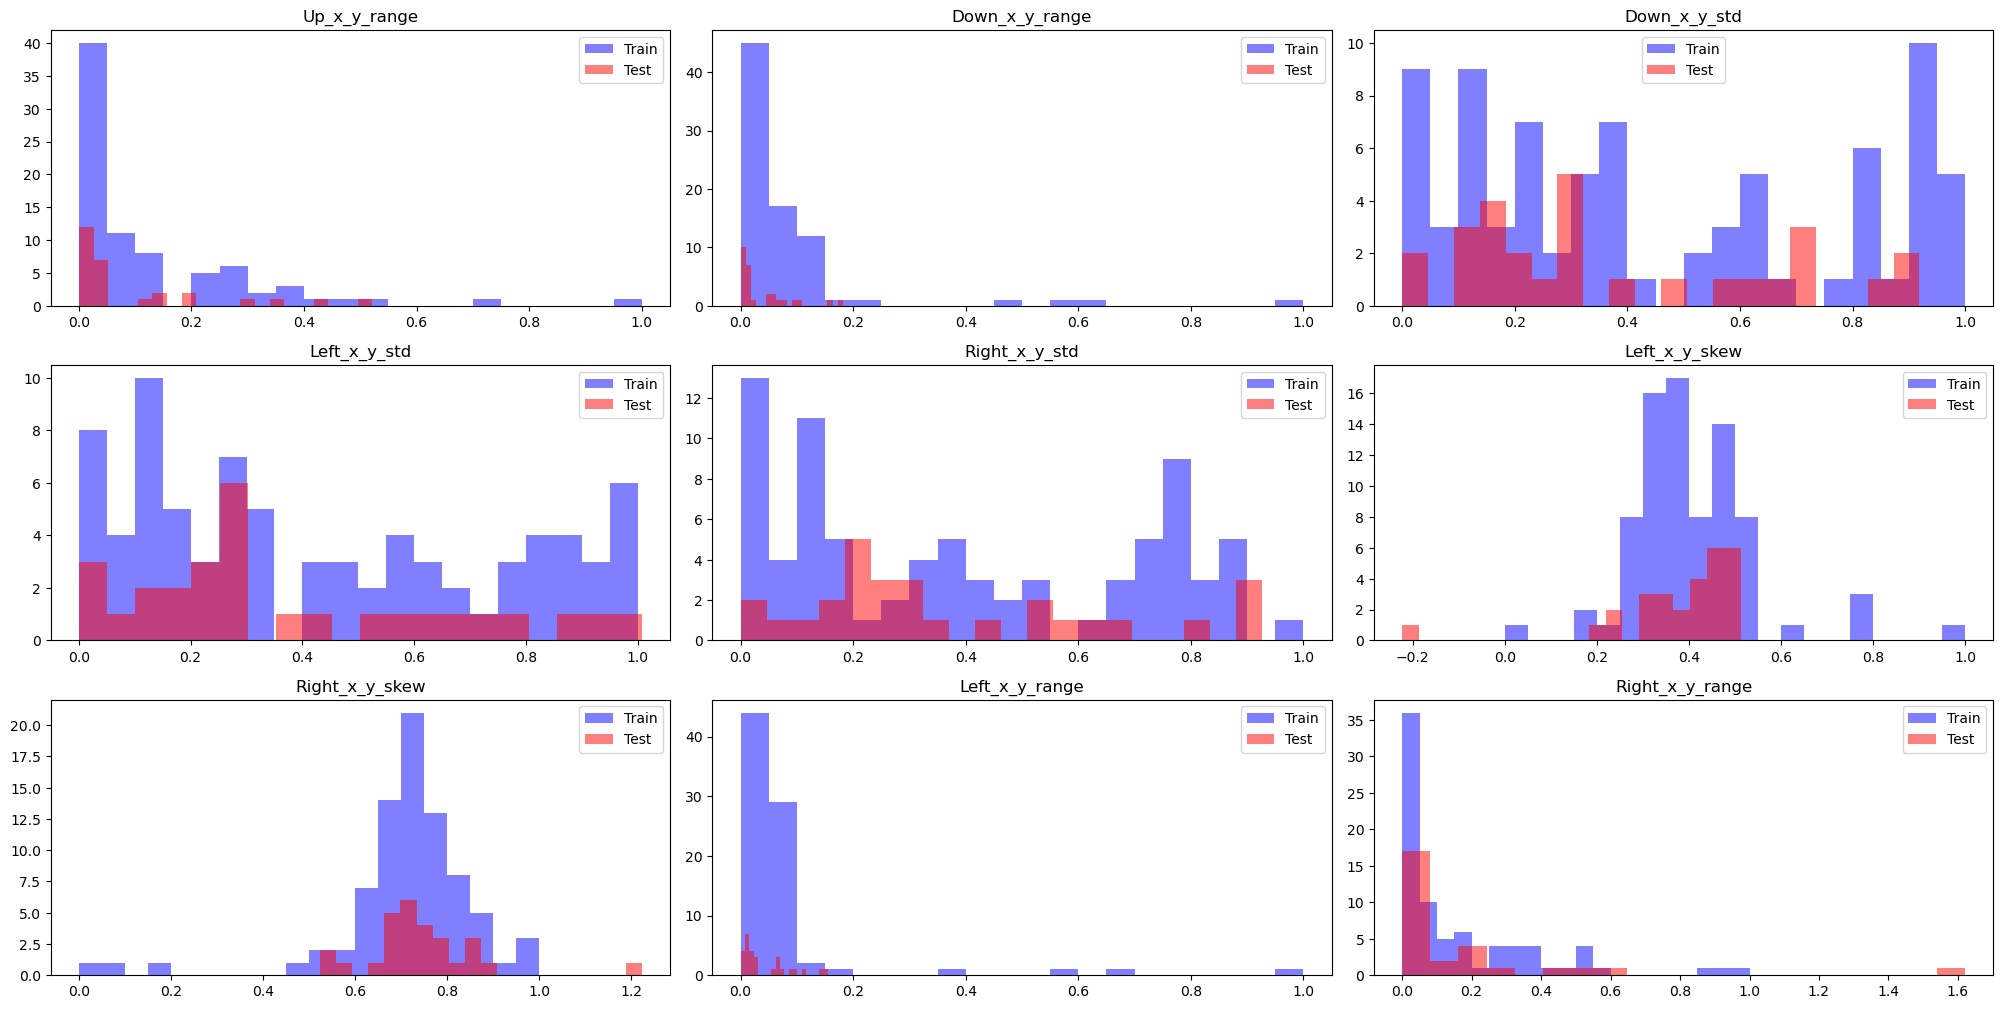

In [17]:
plt.figure(figsize=(20,20))
X_train_plot = X_train_scaled1
for i, feature in enumerate(X_train_plot.columns):
    #Plot each of the train/test features in a separate histogram to compare train and test distributions
    plt.subplot(6,3,i+1) # 6 rows of histograms, with 3 plots in each line
    plt.hist(X_train_scaled1[feature],alpha= 0.5, bins=20,color='blue', label='Train') # Training histogram in blue.
    plt.hist(X_test_scaled1[feature] ,alpha= 0.5, bins=20, color='red', label='Test') # Test histogram in red. Both test and training are plotted in the same histogram.
    plt.title(feature) # The title of each of the histograms is the name of the variable 
    plt.legend()

plt.tight_layout()
plt.show()

In [18]:
__ = Y_train_oversampled == 0
__.value_counts()

y
False    40
True     40
Name: count, dtype: int64

In [19]:
# X_train_scaled = X_train
# X_test_scaled = X_test

In [20]:
X_train_scaled,X_test_scaled

(    Up_x_y_range  Down_x_y_range  Down_x_y_std  Left_x_y_std  Right_x_y_std  \
 0   1.659385e-02    6.722132e-03  9.937635e-02  1.750389e-01   1.541416e-01   
 1   5.444792e-02    2.368290e-01  5.855339e-01  9.457289e-01   2.650293e-03   
 2   1.540283e-02    7.961046e-03  1.158220e-01  2.461259e-01   8.905453e-02   
 3   8.597860e-09    0.000000e+00  8.773115e-11  2.207164e-10   1.338897e-09   
 4   1.427531e-02    2.256332e-02  2.192954e-01  1.144294e-01   1.026245e-01   
 ..           ...             ...           ...           ...            ...   
 58  3.053240e-03    1.228607e-02  3.275511e-01  4.509527e-01   3.960410e-01   
 59  9.849925e-02    4.949450e-02  5.920940e-01  6.261277e-01   6.476245e-01   
 60  4.560108e-09    3.683914e-10  8.471362e-10  1.548167e-10   7.426636e-10   
 61  2.405719e-02    3.080660e-02  5.989431e-01  4.014559e-01   4.591175e-01   
 62  9.120213e-09    6.015548e-01  3.434492e-01  4.802083e-01   6.310891e-10   
 
     Left_x_y_skew  Right_x_y_skew  Le

In [21]:
# X_train_scaled1 = X_train_oversampled
# X_test_scaled1 = X_test

# LOGISTIC REGRESSION

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	79.37	67.86
SEN:	95.00	78.95
ESP:	52.17	44.44
PPV:	77.55	75.00
F1:	85.39	76.92


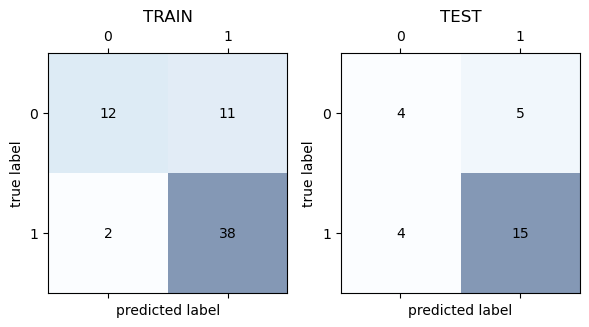

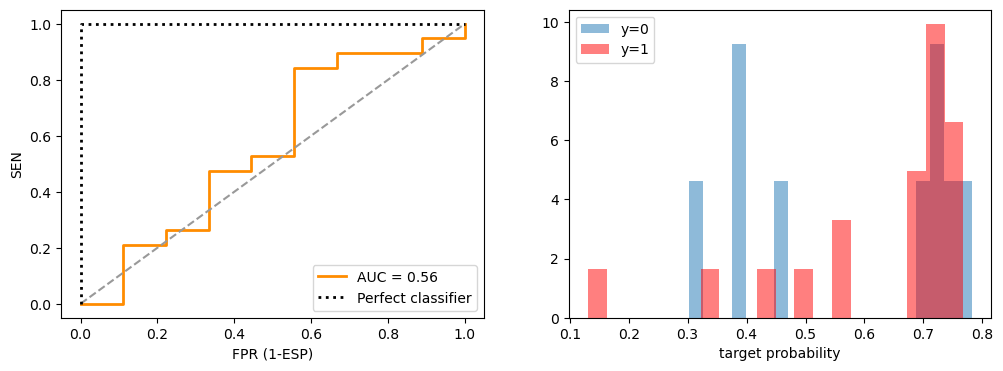

In [22]:
lr_model = LogisticRegression().fit(X_train_scaled,y_train)

# This a custom function, take a look in src.utils
utils.analyze_train_test_performance(lr_model,X_train_scaled,X_test_scaled,y_train,Y_test)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	72.50	60.71
SEN:	80.00	68.42
ESP:	65.00	44.44
PPV:	69.57	72.22
F1:	74.42	70.27


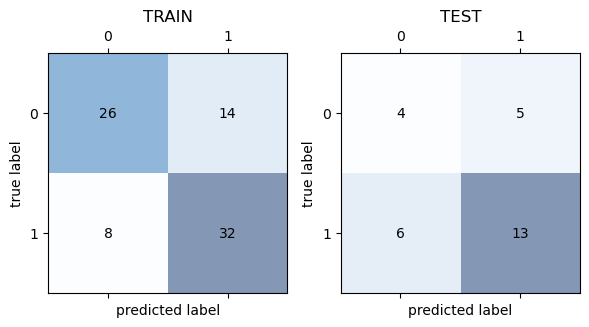

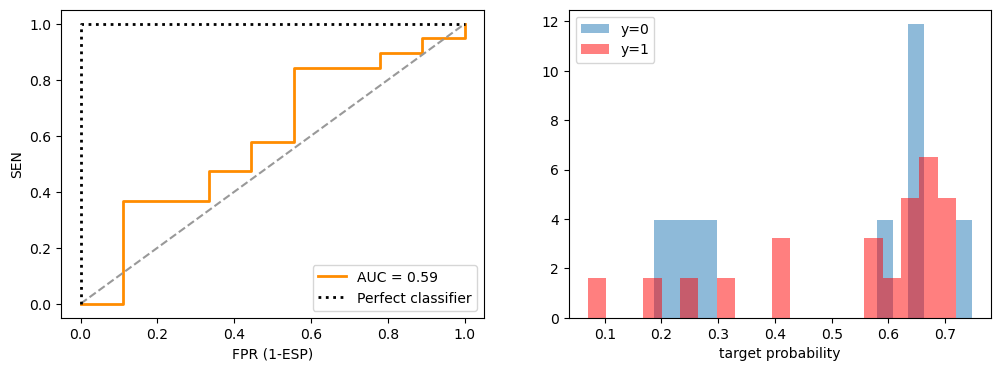

In [23]:
lr_model1 = LogisticRegression().fit(X_train_scaled1,Y_train_oversampled)

# This a custom function, take a look in src.utils
utils.analyze_train_test_performance(lr_model1,X_train_scaled1,X_test_scaled1,Y_train_oversampled,Y_test)

# KNN

In [24]:
from sklearn.model_selection import GridSearchCV

# These are customized functions: should be in utils.py
def hyper_parameters_search(clf, X, y, param_grid, scorer = 'f1', cv=5):
    
    grid = GridSearchCV(clf, param_grid = param_grid, scoring = scorer, cv = cv)
    grid.fit(X, y)

    print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
    print("best parameters: {}".format(grid.best_params_))
    
    return grid

def plot_cv_scoring(grid, hyper_parameter, scorer = 'f1', plot_errors = False, log=False):
    
    scores = np.array(grid.cv_results_['mean_test_score'])
    std_scores = grid.cv_results_['std_test_score']
        
    params = grid.param_grid[hyper_parameter]
    
    if log:
        params = np.log10(params)
    
    if plot_errors:
        plt.errorbar(params,scores,yerr=std_scores, fmt='o-',ecolor='g')
    else:
        plt.plot(params,scores, 'o-')
    plt.xlabel(hyper_parameter,fontsize=14)
    plt.ylabel(scorer)
    plt.show()

best mean cross-validation score: 0.745
best parameters: {'n_neighbors': 7}


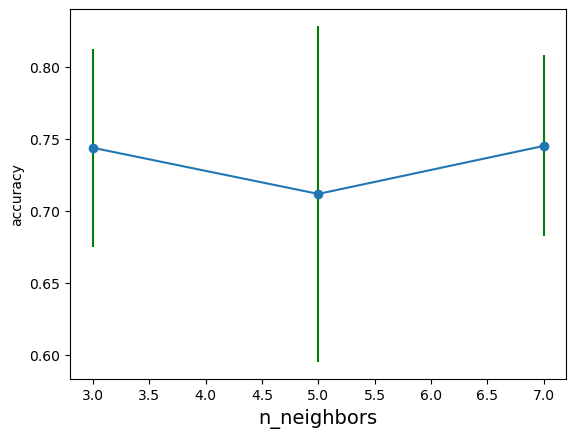

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Metric for the scoring
scorer =  'accuracy' #STUDENT CODE Other possibilities: accuracy, balanced_accuracy, f1, roc_auc, ....

# param_grid
param_grid = {'n_neighbors': range(3,9,2)} 

# Our customized function
grid_knn = hyper_parameters_search(KNeighborsClassifier(), X_train_scaled, y_train, param_grid, scorer = scorer, cv=5)#STUDENT CODE

# do the plotting
plot_cv_scoring(grid_knn,'n_neighbors',scorer, plot_errors=True)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	79.37	75.00
SEN:	95.00	84.21
ESP:	52.17	55.56
PPV:	77.55	80.00
F1:	85.39	82.05


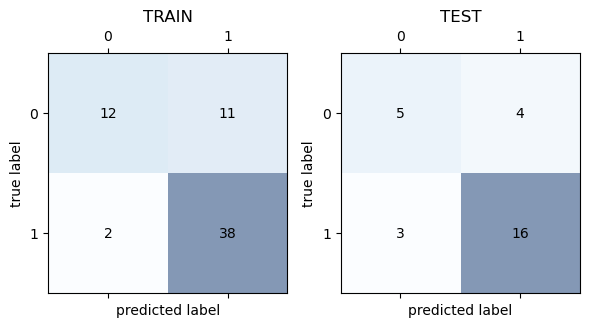

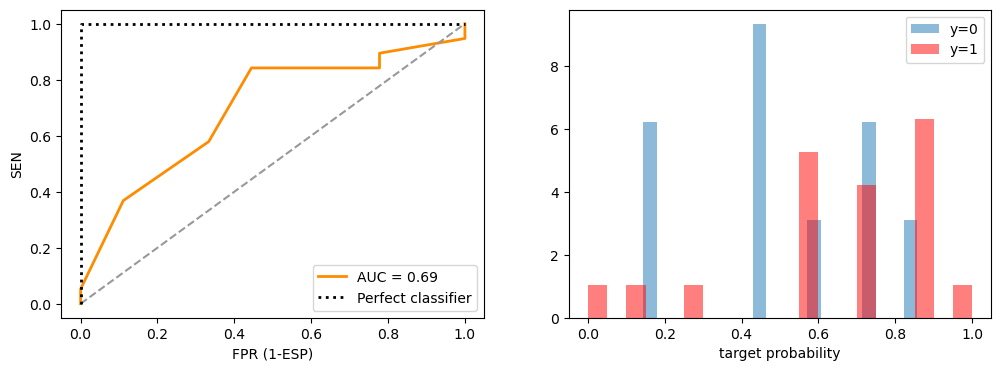

In [26]:
from utils import analyze_train_test_performance  


knn_model =  grid_knn.best_estimator_ 

analyze_train_test_performance(knn_model,X_train_scaled,X_test_scaled,y_train,Y_test)

best mean cross-validation score: 0.738
best parameters: {'n_neighbors': 9}


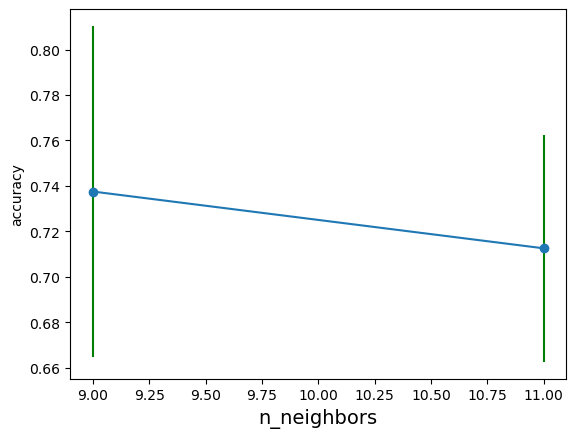

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Metric for the scoring
scorer =  'accuracy' #STUDENT CODE Other possibilities: accuracy, balanced_accuracy, f1, roc_auc, ....

# param_grid
param_grid = {'n_neighbors': range(9,13,2)} 

# Our customized function
grid_knn1 = hyper_parameters_search(KNeighborsClassifier(), X_train_scaled1, Y_train_oversampled, param_grid, scorer = scorer, cv=5)#STUDENT CODE

# do the plotting
plot_cv_scoring(grid_knn1,'n_neighbors',scorer, plot_errors=True)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	81.25	64.29
SEN:	82.50	63.16
ESP:	80.00	66.67
PPV:	80.49	80.00
F1:	81.48	70.59


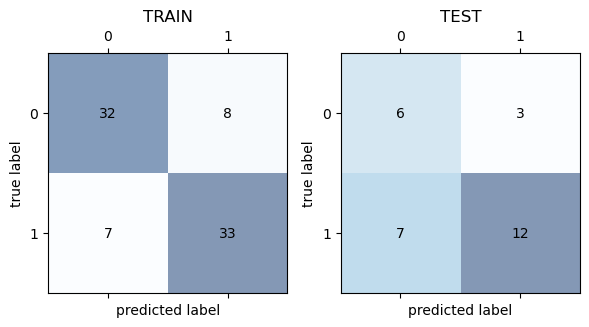

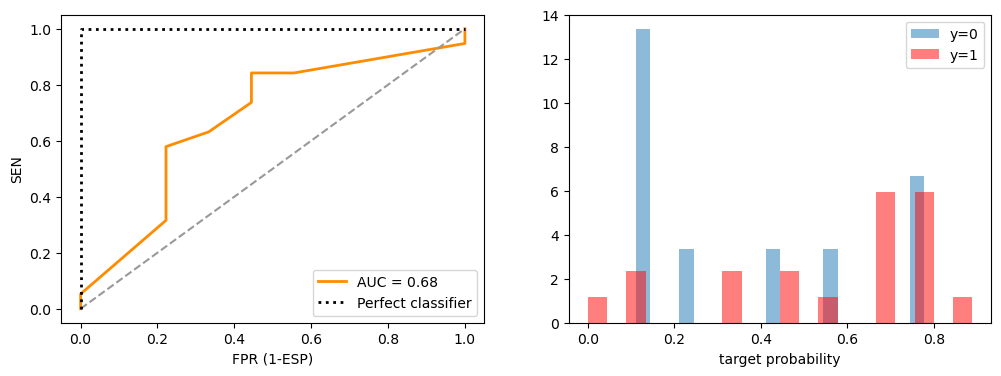

In [28]:
from utils import analyze_train_test_performance  


knn_model1 =  grid_knn1.best_estimator_ 

analyze_train_test_performance(knn_model1,X_train_scaled1,X_test_scaled1,Y_train_oversampled,Y_test)

# DECISION TREES

best mean cross-validation score: 0.794
best parameters: {'max_depth': 1}


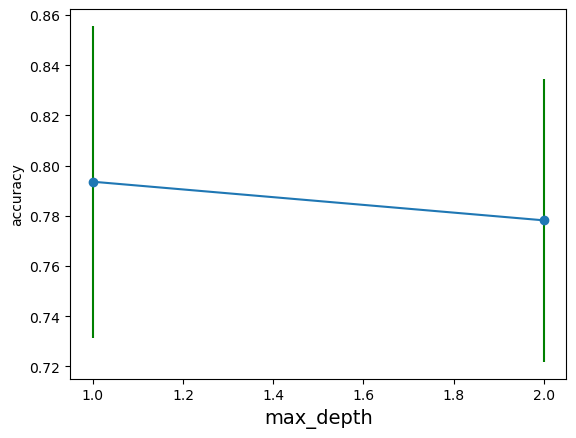

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees
param_grid = {'max_depth': range(1,3)} ## If we look the feature importance below, we can see that there are 2 features that
## are quite important in the score of the decision tree. Therefore, we can appreciate that with more than 1 or 2 of max_depth
## our model starts to get overfitted, and hence our train results considerably improve but test results worsen.

scorer = 'accuracy'

#HYPER PARAMETER SEARCH
grid_dt = hyper_parameters_search(DecisionTreeClassifier(), X_train_scaled, y_train, param_grid, scorer = scorer, cv=5) #STUDENT CODE

# do the plotting
plot_cv_scoring(grid_dt,'max_depth',scorer, plot_errors=True)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	82.54	64.29
SEN:	97.50	73.68
ESP:	56.52	44.44
PPV:	79.59	73.68
F1:	87.64	73.68


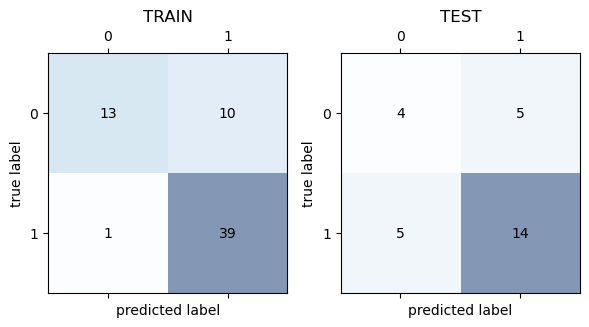

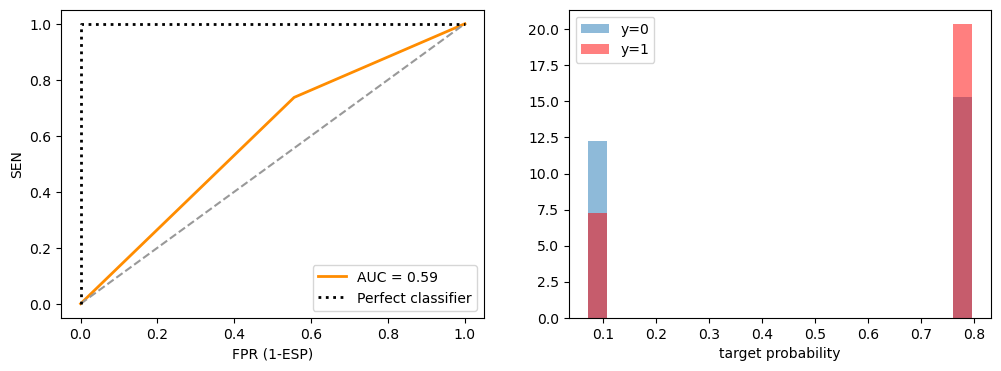

DecisionTreeClassifier(max_depth=1)

In [30]:
dt_model =  grid_dt.best_estimator_ 

analyze_train_test_performance(dt_model,X_train_scaled,X_test_scaled,y_train,Y_test)

dt_model

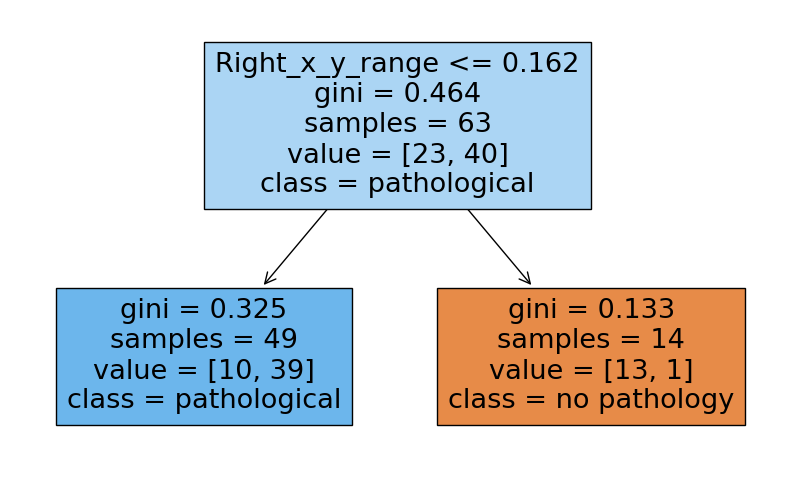

In [31]:
from sklearn.tree import plot_tree

# set plot dimensions
plt.figure(figsize=(10,6))

feature_names=X_train_scaled.columns

plot_tree(
    dt_model,
    feature_names=feature_names, 
    class_names=['no pathology','pathological'], 
    filled=True
)

plt.show()

In [32]:
# feature importance
def plot_importances(importances, feat_names):
    
    df_importances = pd.Series(importances, index=feat_names)
    
    plt.figure()
    df_importances.plot.bar()
    plt.ylabel("Feature Importance")
    plt.show()

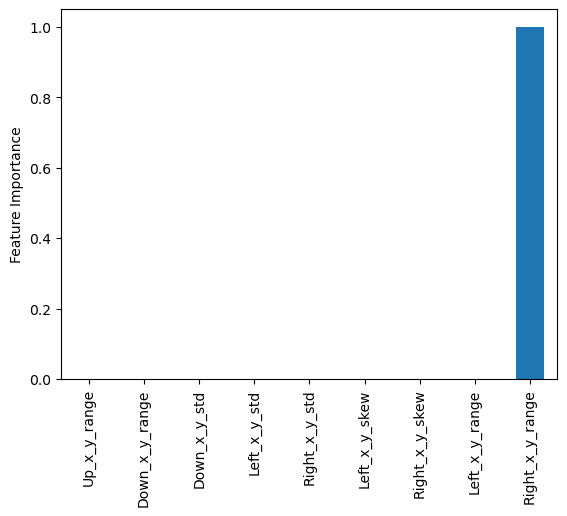

In [33]:
# Plot feature importance
plot_importances(dt_model.feature_importances_, feature_names)

best mean cross-validation score: 0.787
best parameters: {'max_depth': 1}


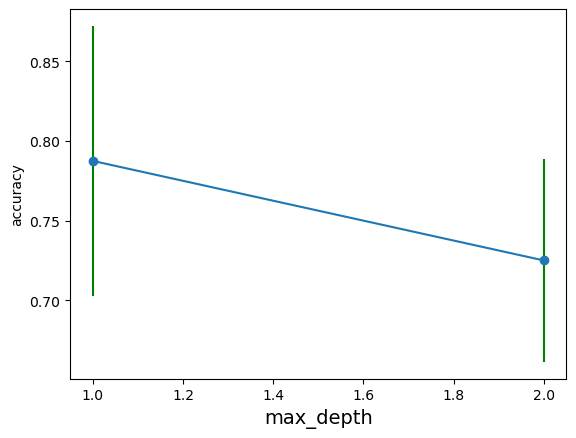

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees
param_grid = {'max_depth': range(1,3)} ## If we look the feature importance below, we can see that there are 2 features that
## are quite important in the score of the decision tree. Therefore, we can appreciate that with more than 1 or 2 of max_depth
## our model starts to get overfitted, and hence our train results considerably improve but test results worsen.

scorer = 'accuracy'

#HYPER PARAMETER SEARCH
grid_dt1 = hyper_parameters_search(DecisionTreeClassifier(), X_train_scaled1, Y_train_oversampled, param_grid, scorer = scorer, cv=5) #STUDENT CODE

# do the plotting
plot_cv_scoring(grid_dt1,'max_depth',scorer, plot_errors=True)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	81.25	64.29
SEN:	97.50	73.68
ESP:	65.00	44.44
PPV:	73.58	73.68
F1:	83.87	73.68


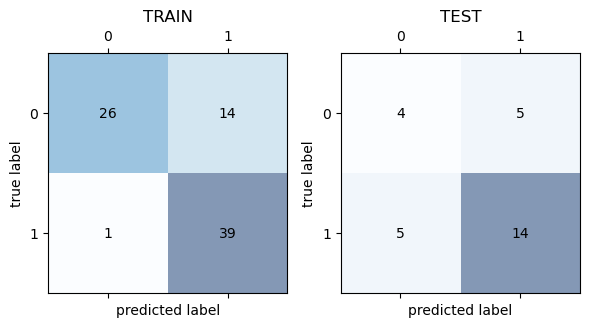

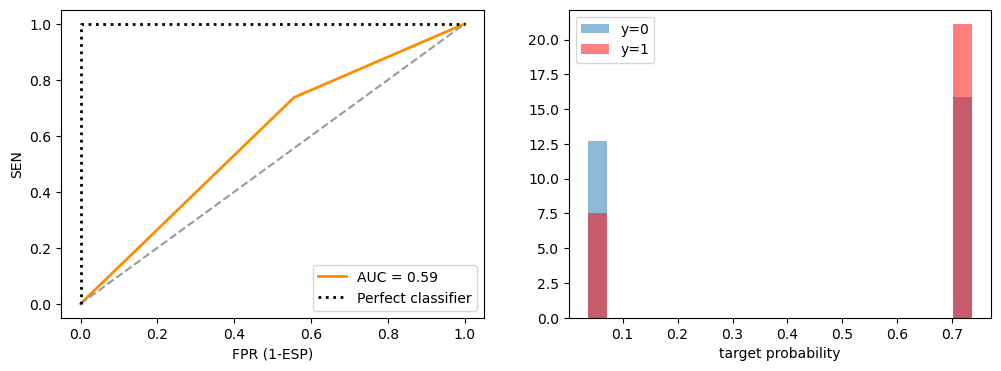

DecisionTreeClassifier(max_depth=1)

In [35]:
dt_model1 =  grid_dt1.best_estimator_ 

analyze_train_test_performance(dt_model1,X_train_scaled1,X_test_scaled1,Y_train_oversampled,Y_test)

dt_model1

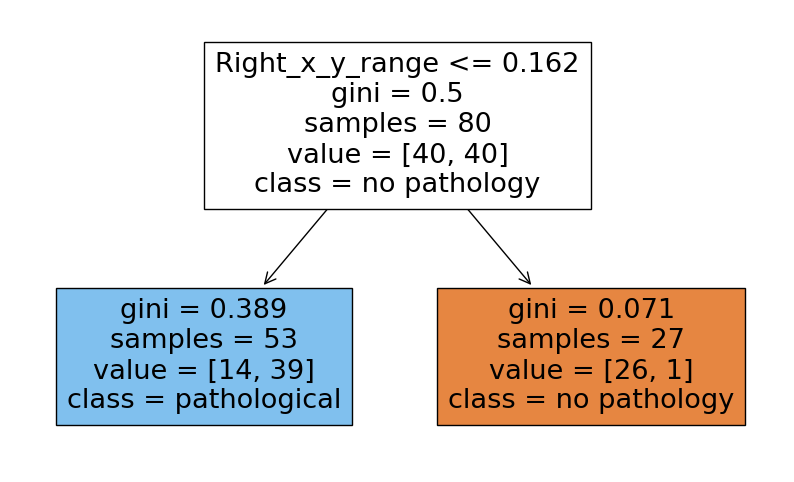

In [36]:
from sklearn.tree import plot_tree

# set plot dimensions
plt.figure(figsize=(10,6))

feature_names=X_train_scaled1.columns

plot_tree(
    dt_model1,
    feature_names=feature_names, 
    class_names=['no pathology','pathological'], 
    filled=True
)

plt.show()

In [37]:
# feature importance
def plot_importances(importances, feat_names):
    
    df_importances = pd.Series(importances, index=feat_names)
    
    plt.figure()
    df_importances.plot.bar()
    plt.ylabel("Feature Importance")
    plt.show()

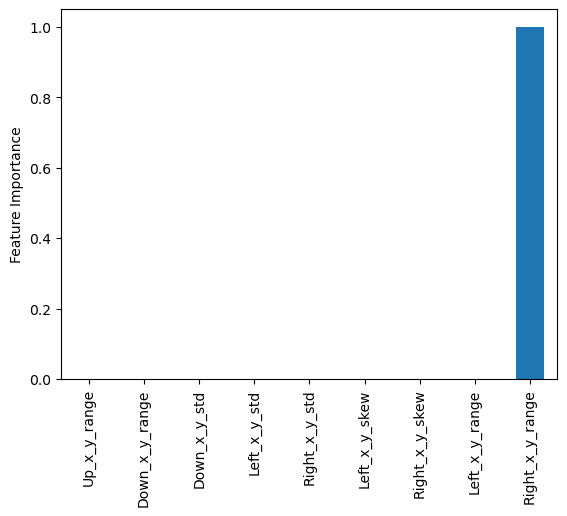

In [38]:
# Plot feature importance
plot_importances(dt_model1.feature_importances_, feature_names)

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
param_grid = {'max_depth': range(1,3),
              'n_estimators' : [2, 4, 5]}

# 3.1.Model selection ... this might take a while

scorer = 'accuracy'

#hyper_parameters_search

grid_rf = hyper_parameters_search(RandomForestClassifier(), X_train_scaled, y_train, param_grid, scorer = scorer, cv=5)

best mean cross-validation score: 0.794
best parameters: {'max_depth': 1, 'n_estimators': 5}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	76.19	64.29
SEN:	95.00	84.21
ESP:	43.48	22.22
PPV:	74.51	69.57
F1:	83.52	76.19


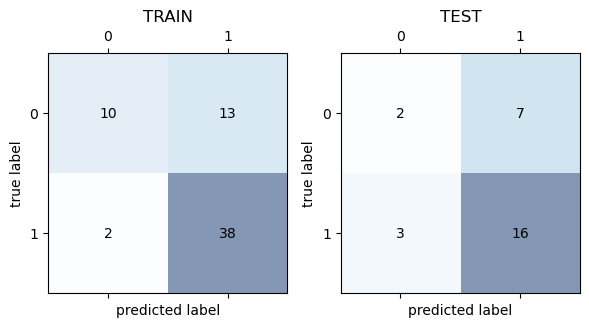

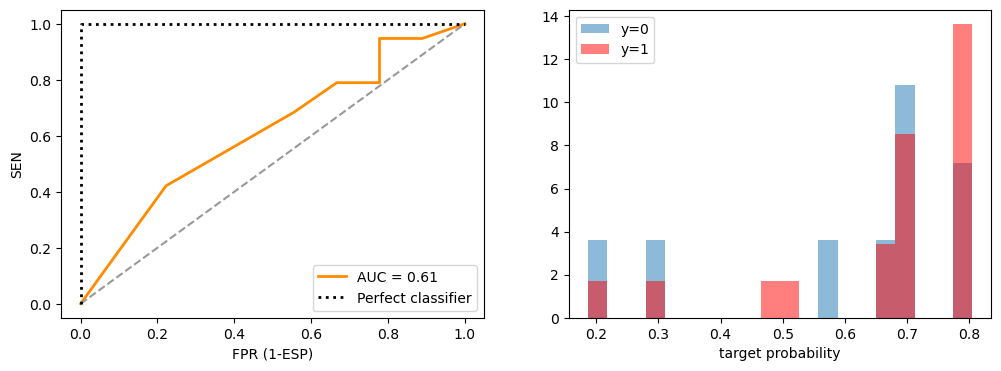

In [40]:
rf_model =  RandomForestClassifier(random_state=0, **grid_rf.best_params_).fit(X_train_scaled,y_train)
analyze_train_test_performance(rf_model,X_train_scaled,X_test_scaled,y_train,Y_test)

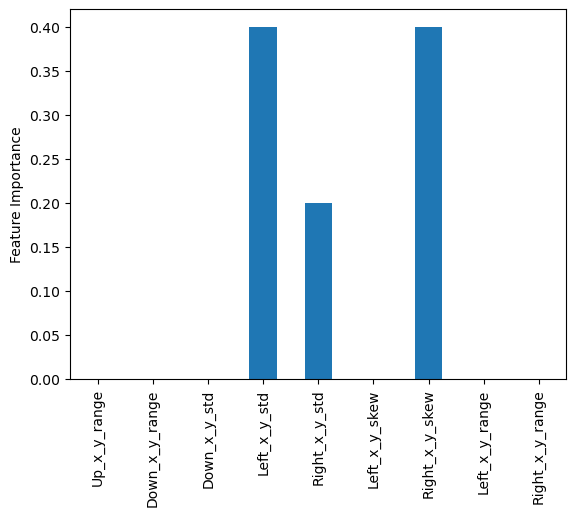

In [41]:
plot_importances(rf_model.feature_importances_, feature_names)

In [42]:
param_grid = {'max_depth': range(1,3),
              'n_estimators' : [2, 4, 5]}

# 3.1.Model selection ... this might take a while

scorer = 'accuracy'

#hyper_parameters_search

grid_rf1 = hyper_parameters_search(RandomForestClassifier(), X_train_scaled1, Y_train_oversampled, param_grid, scorer = scorer, cv=5)

best mean cross-validation score: 0.775
best parameters: {'max_depth': 2, 'n_estimators': 5}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	81.25	64.29
SEN:	97.50	73.68
ESP:	65.00	44.44
PPV:	73.58	73.68
F1:	83.87	73.68


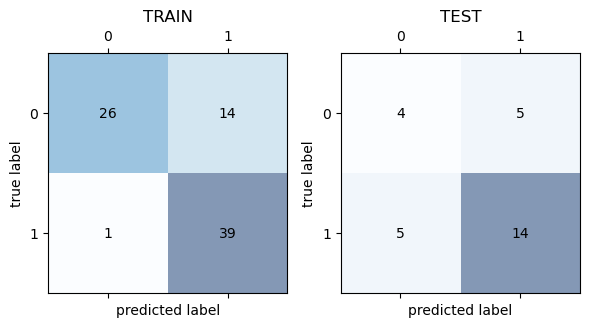

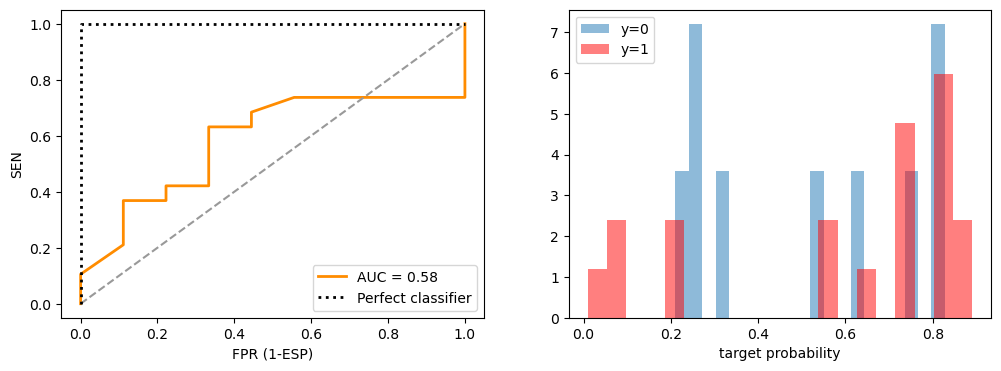

In [43]:
rf_model1 =  RandomForestClassifier(random_state=0, **grid_rf1.best_params_).fit(X_train_scaled1,Y_train_oversampled)
analyze_train_test_performance(rf_model1,X_train_scaled1,X_test_scaled1,Y_train_oversampled,Y_test)

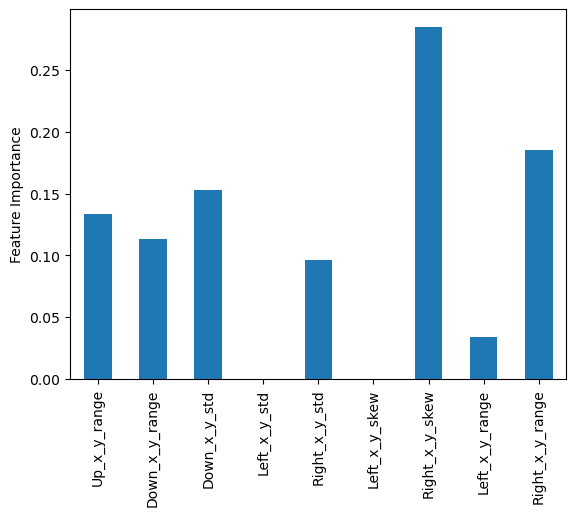

In [44]:
plot_importances(rf_model1.feature_importances_, feature_names)

# Gradient boosting trees

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators' : [10,20,50],   #,500, 1000, 2000], with 500 overfits the model
    'learning_rate': [0.005, 0.001], 
    'max_depth': [1, 2]
} 

# 4.1 Model selection ... this might take a while

scorer = 'accuracy'

#hyper parameter search 
grid_bt = hyper_parameters_search(GradientBoostingClassifier(), X_train_scaled, y_train, param_grid, scorer = scorer, cv=5)

best mean cross-validation score: 0.778
best parameters: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 50}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	84.13	60.71
SEN:	100.00	73.68
ESP:	56.52	33.33
PPV:	80.00	70.00
F1:	88.89	71.79


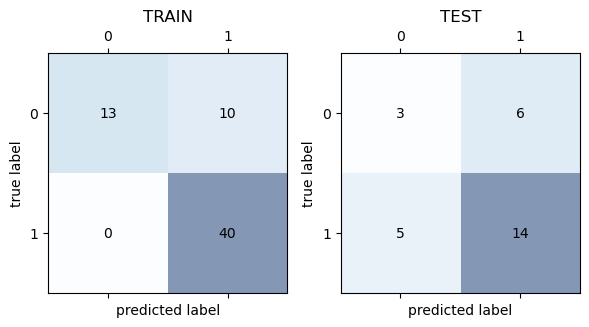

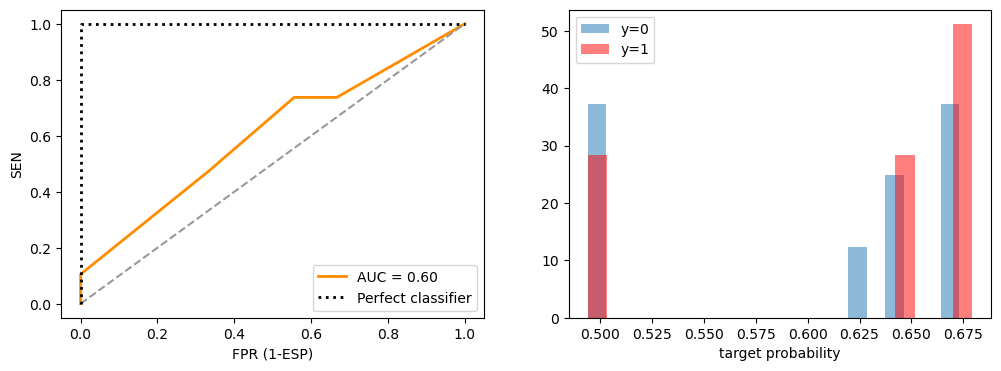

In [46]:
bt_model =  GradientBoostingClassifier(random_state=0, **grid_bt.best_params_).fit(X_train_scaled,y_train)
analyze_train_test_performance(bt_model,X_train_scaled,X_test_scaled,y_train,Y_test)

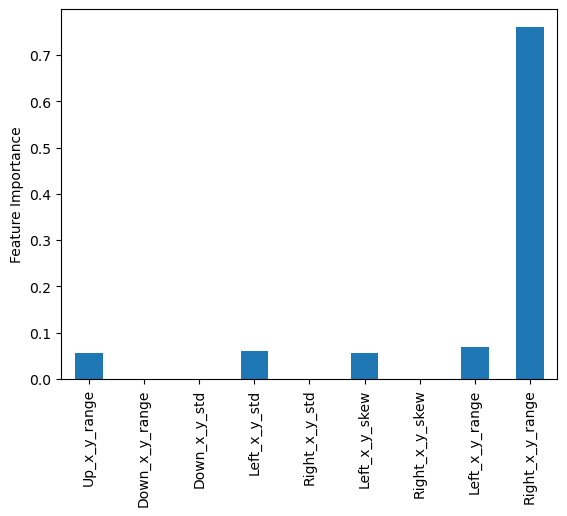

In [47]:
plot_importances(bt_model.feature_importances_, feature_names)

In [48]:
param_grid = {
    'n_estimators' : [10,20,50],   #,500, 1000, 2000], with 500 overfits the model
    'learning_rate': [0.005, 0.001], 
    'max_depth': [1, 2]
} 

# 4.1 Model selection ... this might take a while

scorer = 'accuracy'

#hyper parameter search 
grid_bt1 = hyper_parameters_search(GradientBoostingClassifier(), X_train_scaled1, Y_train_oversampled, param_grid, scorer = scorer, cv=5)

best mean cross-validation score: 0.787
best parameters: {'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 10}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	81.25	64.29
SEN:	97.50	73.68
ESP:	65.00	44.44
PPV:	73.58	73.68
F1:	83.87	73.68


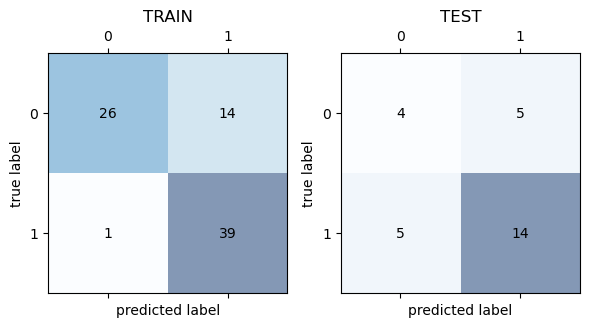

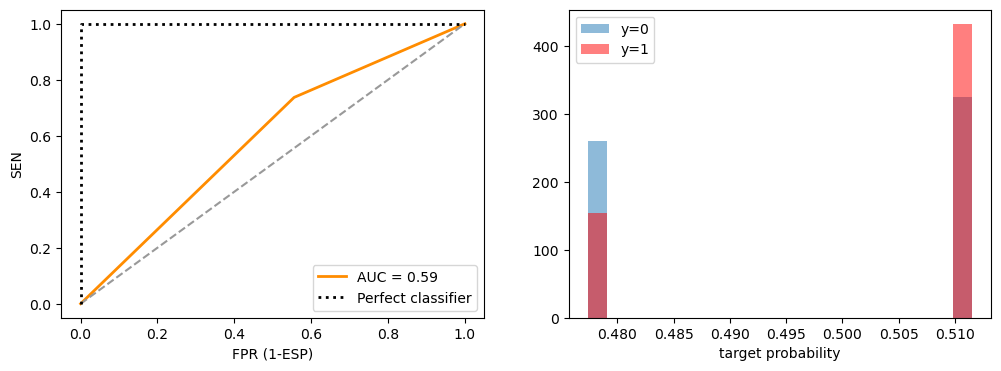

In [49]:
bt_model1 =  GradientBoostingClassifier(random_state=0, **grid_bt1.best_params_).fit(X_train_scaled1,Y_train_oversampled)
analyze_train_test_performance(bt_model1,X_train_scaled1,X_test_scaled1,Y_train_oversampled,Y_test)

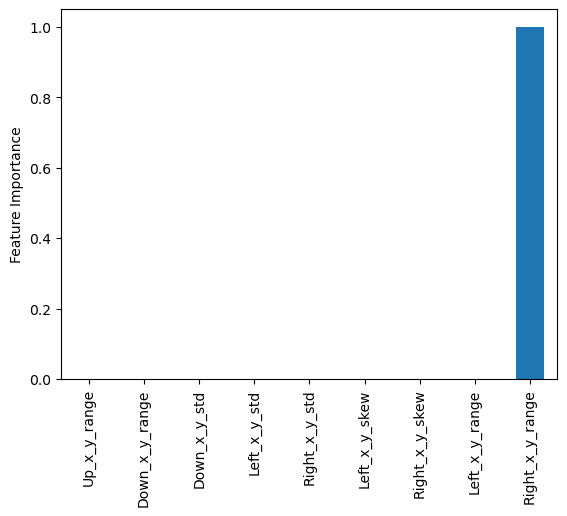

In [50]:
plot_importances(bt_model1.feature_importances_, feature_names)

# Multilayer perceptron

In [51]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier

param_grid = {
    'alpha' : 10.0 ** -np.arange(1, 3), # following recommendation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use
    'hidden_layer_sizes': [(1,3),(2,1)]}


# 5.1 Model selection ...

#hyper_parameters_search()
grid_mlp = hyper_parameters_search(MLPClassifier(), X_train_scaled, y_train, param_grid, scorer = scorer, cv=5)

best mean cross-validation score: 0.636
best parameters: {'alpha': 0.1, 'hidden_layer_sizes': (2, 1)}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	69.84	71.43
SEN:	100.00	100.00
ESP:	17.39	11.11
PPV:	67.80	70.37
F1:	80.81	82.61


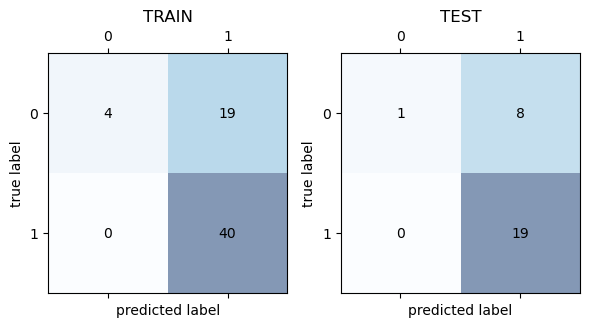

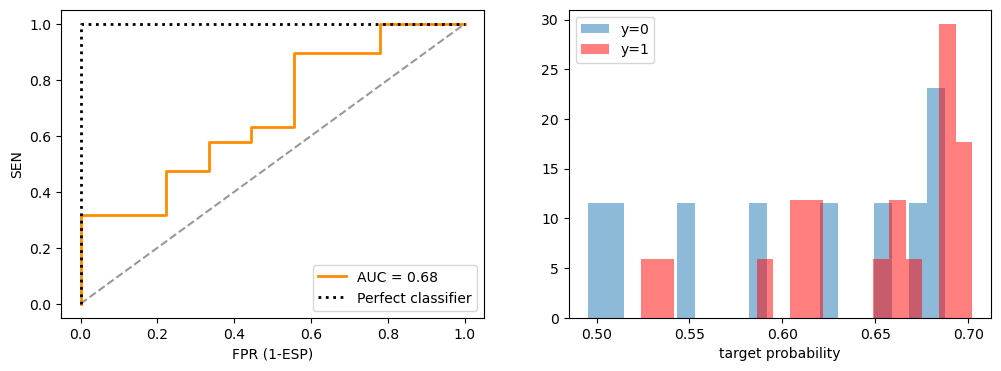

In [52]:
mlp_model =  MLPClassifier(random_state=0, **grid_mlp.best_params_).fit(X_train_scaled,y_train)
analyze_train_test_performance(mlp_model,X_train_scaled,X_test_scaled,y_train,Y_test)

In [53]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier

param_grid = {
    'alpha' : 10.0 ** -np.arange(1, 3), # following recommendation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use
    'hidden_layer_sizes': [(1,3),(2,1)]}


# 5.1 Model selection ...

#hyper_parameters_search()
grid_mlp1 = hyper_parameters_search(MLPClassifier(), X_train_scaled1, Y_train_oversampled, param_grid, scorer = scorer, cv=5)

best mean cross-validation score: 0.575
best parameters: {'alpha': 0.1, 'hidden_layer_sizes': (1, 3)}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	67.50	60.71
SEN:	62.50	68.42
ESP:	72.50	44.44
PPV:	69.44	72.22
F1:	65.79	70.27


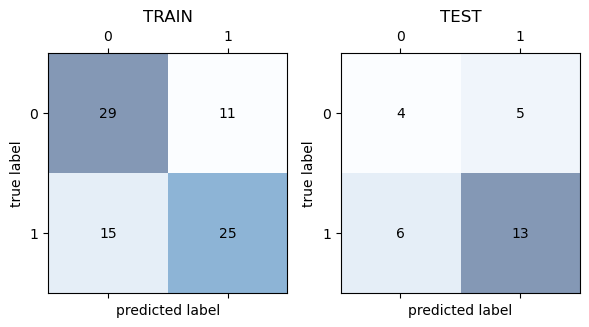

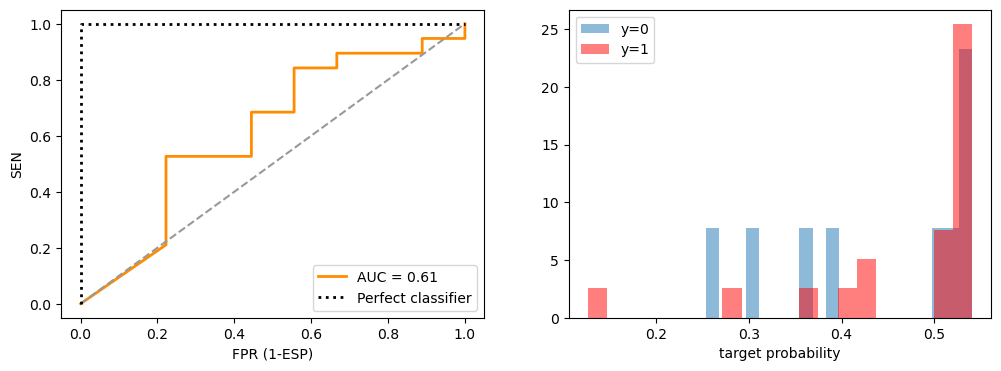

In [54]:
mlp_model1 =  MLPClassifier(random_state=0, **grid_mlp1.best_params_).fit(X_train_scaled1,Y_train_oversampled)
analyze_train_test_performance(mlp_model1,X_train_scaled1,X_test_scaled1,Y_train_oversampled,Y_test)

# Models comparison

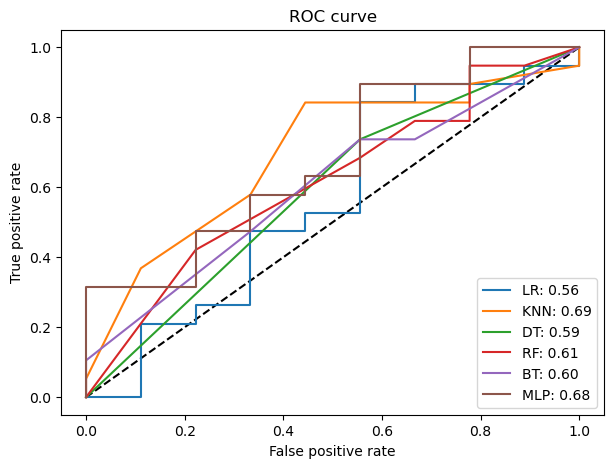

In [55]:
from sklearn.metrics import roc_curve, auc

modelos = {'LR': lr_model, 'KNN':knn_model,'DT':dt_model, 'RF': rf_model, 'BT': bt_model, 'MLP': mlp_model}

plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--')
for k,v in modelos.items():
    fpr, tpr,_ = roc_curve(Y_test, modelos[k].predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = k + ': %0.2f' % roc_auc)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

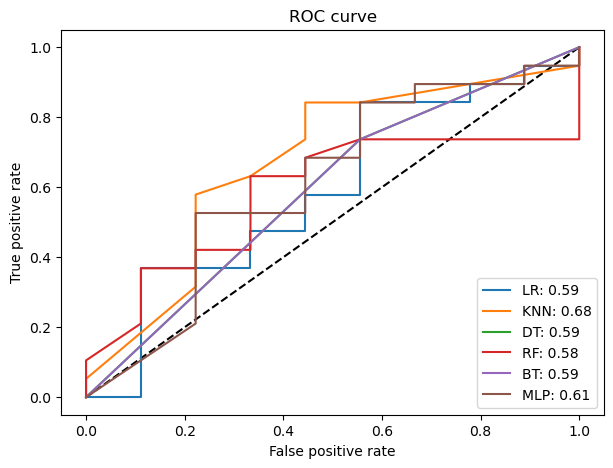

In [56]:

modelos = {'LR': lr_model1, 'KNN':knn_model1,'DT':dt_model1, 'RF': rf_model1, 'BT': bt_model1, 'MLP': mlp_model1}

plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--')
for k,v in modelos.items():
    fpr, tpr,_ = roc_curve(Y_test, modelos[k].predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = k + ': %0.2f' % roc_auc)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()